https://www.youtube.com/watch?v=ok2s1vV9XW0

Machine Learning Tutorial Python - 11 Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
data_raw = pd.read_csv('titanic.csv')

In [3]:
data_raw.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
data_drop = data_raw.drop(['PassengerId', 'Name',  'SibSp', 'Cabin', 'Parch', 'Ticket', 'Embarked'], axis = 1)

In [5]:
data_drop.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


Age HAS 177 EMPTY VALUES, WE REPLACED WITH THE MEAN OF THIS COLUMN

In [6]:
data_drop.Age = data_drop.Age.fillna(data_drop.Age.mean())

CATEGORIZING FARE AND AGE

In [7]:
bins = [0, 2, 5, 10, 15, 20, 30, 40, 50, 66]
names = ['<2', '2-5', '6-10', '11-15', '16-20','21-30', '31-40','41-50','51-66','67+']

In [8]:
d = dict(enumerate(names, 1))

In [9]:
data_drop['AgeRange'] = np.vectorize(d.get)(np.digitize(data_drop['Age'], bins))

In [10]:
bins1 = [0, 2, 5, 10, 15, 20, 50, 66]
names1 = ['<2', '2-5', '6-10', '11-15', '16-20','21-50','51-66','67+']

In [11]:
d1 = dict(enumerate(names1, 1))

In [12]:
data_drop['FareRange'] = np.vectorize(d1.get)(np.digitize(data_drop['Fare'], bins))

In [13]:
data_drop.head()

,Survived,Pclass,Sex,Age,Fare,AgeRange,FareRange
0,0,3,male,22.0,7.2500,21-30,6-10
1,1,1,female,38.0,71.2833,31-40,None
2,1,3,female,26.0,7.9250,21-30,6-10
3,1,1,female,35.0,53.1000,31-40,None
4,0,3,male,35.0,8.0500,31-40,6-10


DUMMIES CONVERSION

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le_Sex = LabelEncoder()
le_AgeRange = LabelEncoder()
le_FareRange = LabelEncoder()


In [16]:
data_drop['Sex_n'] = le_Sex.fit_transform(data_drop['Sex'])
data_drop['AgeRange_n'] = le_AgeRange.fit_transform(data_drop['AgeRange'])
data_drop['FareRange_n'] = le_FareRange.fit_transform(data_drop['FareRange'])


In [17]:
data_drop.head()

,Survived,Pclass,Sex,Age,Fare,AgeRange,FareRange,Sex_n,AgeRange_n,FareRange_n
0,0,3,male,22.0,7.2500,21-30,6-10,1,3,5
1,1,1,female,38.0,71.2833,31-40,None,0,4,8
2,1,3,female,26.0,7.9250,21-30,6-10,0,3,5
3,1,1,female,35.0,53.1000,31-40,None,0,4,8
4,0,3,male,35.0,8.0500,31-40,6-10,1,4,5


In [18]:
data_clean = data_drop.copy()

In [19]:
data_clean.head()

,Survived,Pclass,Sex,Age,Fare,AgeRange,FareRange,Sex_n,AgeRange_n,FareRange_n
0,0,3,male,22.0,7.2500,21-30,6-10,1,3,5
1,1,1,female,38.0,71.2833,31-40,None,0,4,8
2,1,3,female,26.0,7.9250,21-30,6-10,0,3,5
3,1,1,female,35.0,53.1000,31-40,None,0,4,8
4,0,3,male,35.0,8.0500,31-40,6-10,1,4,5


In [20]:
data_clean = data_clean.drop(['Sex', 'Fare', 'Age', 'AgeRange', 'FareRange'], axis = 1)

In [21]:
data_clean.head()

,Survived,Pclass,Sex_n,AgeRange_n,FareRange_n
0,0,3,1,3,5
1,1,1,0,4,8
2,1,3,0,3,5
3,1,1,0,4,8
4,0,3,1,4,5


SELECTING THE INPUT AND THE TARGET

In [22]:
x = data_clean.drop(['Survived'], axis = 1)

In [23]:
y = data_clean['Survived']

In [24]:
x.head()

,Pclass,Sex_n,AgeRange_n,FareRange_n
0,3,1,3,5
1,1,0,4,8
2,3,0,3,5
3,1,0,4,8
4,3,1,4,5


In [25]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

SELECTING DATA TO TRAING AND TO TEST

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train,  y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

In [49]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=30)

In [50]:
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
model.predict(x_test)

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [52]:
model.score(x_test,y_test)

0.8044692737430168

FINDING THE PROBABILITY OF SURVIVE

In [53]:
model.predict_proba(x_test[:10])

array([[0.84826721, 0.15173279],
       [0.8916539 , 0.1083461 ],
       [0.86393964, 0.13606036],
       [0.01666667, 0.98333333],
       [0.96666667, 0.03333333],
       [0.07725026, 0.92274974],
       [0.46195619, 0.53804381],
       [0.92820513, 0.07179487],
       [0.1844284 , 0.8155716 ],
       [0.02777778, 0.97222222]])

CONFUSION MATRIX

In [54]:
y_predicted = model.predict(x_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[94, 11],
       [24, 50]], dtype=int64)

In [55]:
cm_df = pd.DataFrame(cm)
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,94,11
Actual 1,24,50


TO VISUALIZE THE CONFUSION MATRIX

Text(30.5, 0.5, 'Truth')

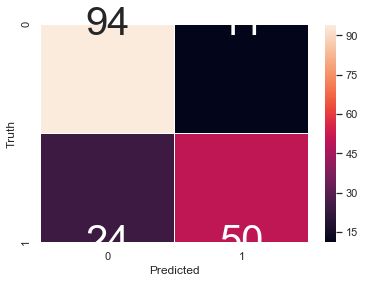

In [56]:
#plt.figure(figsize = (12,10))
sns.heatmap(cm, annot = True,annot_kws={'size':40}, linewidths=.5)
#plt.xlim(-1, 10)
plt.ylim(0, 2)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [57]:
data_grouping = data_clean.copy()

In [58]:
data_grouping['quantity'] = 1

In [59]:
data_grouping.head()

,Survived,Pclass,Sex_n,AgeRange_n,FareRange_n,quantity
0,0,3,1,3,5,1
1,1,1,0,4,8,1
2,1,3,0,3,5,1
3,1,1,0,4,8,1
4,0,3,1,4,5,1


In [62]:
data_gropu = data_grouping.groupby(['Survived', 'Sex_n']).quantity.sum() 

In [63]:
data_gropu

Survived  Sex_n
0         0         81
          1        468
1         0        233
          1        109
Name: quantity, dtype: int64

In [64]:
data_gropu = data_grouping.groupby(['Survived', 'Sex_n'])['quantity'].sum() 

In [65]:
data_gropu

Survived  Sex_n
0         0         81
          1        468
1         0        233
          1        109
Name: quantity, dtype: int64

In [ ]:
#group_data = df.groupby(['Alphabet','Words'])['COUNTER'].sum()

In [67]:
data_gropAge = data_grouping.groupby(['Survived', 'AgeRange_n'])['quantity'].sum() 

In [68]:
data_gropAge

Survived  AgeRange_n
0         0               9
          1              52
          2              11
          3             268
          4              94
          5              55
          6              40
          7              11
          8               7
          9               2
1         0               7
          1              34
          2              15
          3             129
          4              73
          5              34
          6              26
          7              11
          8               1
          9              12
Name: quantity, dtype: int64

In [69]:
data_gropFare = data_grouping.groupby(['Survived', 'FareRange_n'])['quantity'].sum() 

In [70]:
data_gropFare 

Survived  FareRange_n
0         0               74
          1               29
          2                1
          3               78
          4               36
          5              254
          6               11
          7               14
          8               52
1         0               47
          1               29
          3               58
          4               28
          5               66
          6                4
          7                1
          8              109
Name: quantity, dtype: int64